data:  [0.09849886 0.59712344] [-1.48145856 -1.24518118] [-0.13586149  0.22866251]
centroids:  [[ 0.44960051  0.00758596]
 [-1.32082956 -0.6556437 ]]
start process:

step= 1
labels:  0 1 0
center0, center1:  [0.70529279 0.66997343] [-1.27243544 -1.20871494]
delta0, delta1 :  0.7100251395422079 0.5551844638009539
step= 2
labels:  0 1 0
center0, center1:  [0.71117276 0.6805517 ] [-1.25959157 -1.20721102]
delta0, delta1 :  0.012102645348915461 0.012931620844109688
step= 3
labels:  0 1 0
center0, center1:  [0.71120655 0.6806125 ] [-1.25946051 -1.20719568]
delta0, delta1 :  6.955543303975624e-05 0.00013195531473590323
step= 4
labels:  0 1 0
center0, center1:  [0.71120675 0.68061285] [-1.25945917 -1.20719552]
delta0, delta1 :  3.99743868120863e-07 1.3464828034352254e-06
step= 5
labels:  0 1 0
center0, center1:  [0.71120675 0.68061285] [-1.25945916 -1.20719552]
delta0, delta1 :  2.297378466259331e-09 1.3739620328025922e-08


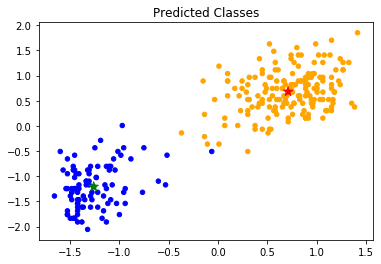

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def make_graphic(data):
    plt.scatter(*data.T)
    plt.xlabel('Eruption time (min)')
    plt.ylabel('Waiting time til next eruption (min)')
    plt.show()
    
def make_graphic_classes(data,labels):
    plt.scatter(*data.T, c=np.where(labels, "blue", "orange"), s=20)
    plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
    plt.title('Predicted Classes')
    plt.show()
    
def mark_distances(data,centroids):
    raznost1=(data-centroids[0])
    raznost2=(data-centroids[1])
    distance=[]
    for i in range(0,len(raznost1),1):
        b=[np.linalg.norm(raznost1[i]),np.linalg.norm(raznost2[i])]
        distance.append(b)
    return distance

def get_label(data,centroids):
    
    dist=mark_distances(data,centroids)
    label=np.argmin(dist, axis=1)
    
    return label

def one_step(data,centroids,labels):
    #make_graphic_classes(data,labels)
    labels=get_label(data,centroids)
    print("labels: ",labels[0],labels[1],labels[2])
    #print(labels)
    #make_graphic_classes(data,labels)


    mask=(labels==0)
    center0=data[mask].mean(axis=0)
    mask=(labels==1)
    center1=data[mask].mean(axis=0)
    print("center0, center1: " ,center0,center1)
    
    delta0=np.linalg.norm(center0-centroids[0])
    delta1=np.linalg.norm(center1-centroids[1])

    centroids[0]=center0
    centroids[1]=center1
    
    
    return centroids,labels,delta0,delta1


    
    

data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
#make_graphic(data,labels)

data=data-data.mean(axis=0);
data=data/data.std(axis=0)
print("data: ",data[0],data[1],data[2])

#centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))
centroids=data[73:75:1]
print("centroids: ",centroids)

delta0=1
delta1=1
global labels
labels=np.ones(272)

print("start process:\n")

i=1

while(max(delta0,delta1)>0.000001):
    print("step=",i)
    #make_graphic_classes(data,labels)
    i=i+1
    centroids,labels,delta0,delta1=one_step(data,centroids,labels)
    print("delta0, delta1 : ",delta0,delta1)
    
make_graphic_classes(data,labels)    